## Name : Samrat Halder
### The Sparks Foundation : Task 1 Supervised ML(Linear Regression)

In [1]:
#Importing all nececessary libraries
import numpy as np
import pandas as pd
import urllib.request 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the dataset using the link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
response = urllib.request.urlopen(url)
df = pd.read_csv(response)

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


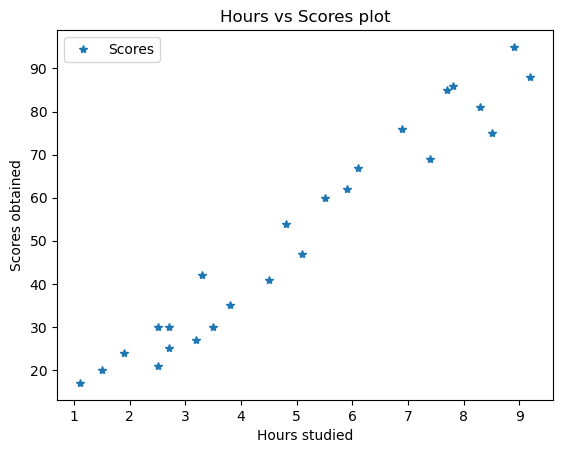

In [4]:
#plotting the distribution of scores
df.plot(x = 'Hours' , y = 'Scores' , style = '*')
plt.title('Hours vs Scores plot')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.show()

### From the graph above , we can see that there is a positive linear relationship between the number of hours studied and scores obtained.

#### Preparing the data

In [5]:
#Independent variable
x = df.iloc[: , :-1].values
#dependent variable
y = df.iloc[: , -1].values

In [6]:
#Next step is to split the data into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

### Training the Simple Linear Regression model on the Training set

In [7]:
#Simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

### Making Predictions

In [8]:
print(x_test)   #Testing data - In Hours
y_pred = regressor.predict(x_test)


[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [9]:
#Comparing actual vs Predicted
com_df = pd.DataFrame({"Actual" : y_test , "Predicted" : y_pred})
com_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Visualising the Training set results

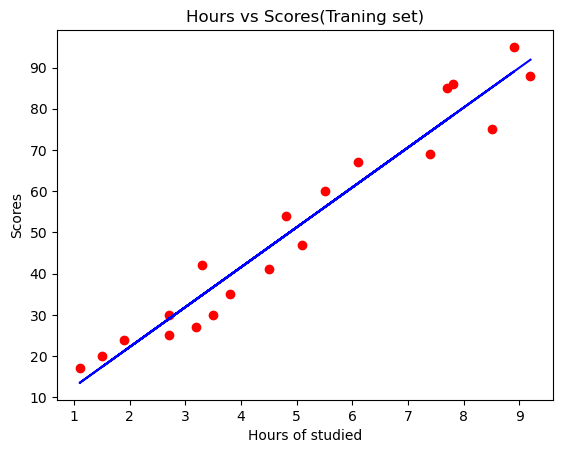

In [10]:
plt.scatter(x_train , y_train , color = "red")
plt.plot(x_train , regressor.predict(x_train) , color = "blue")
plt.title('Hours vs Scores(Traning set)')
plt.xlabel('Hours of studied')
plt.ylabel('Scores')
plt.show()

### Visualising the Test set results

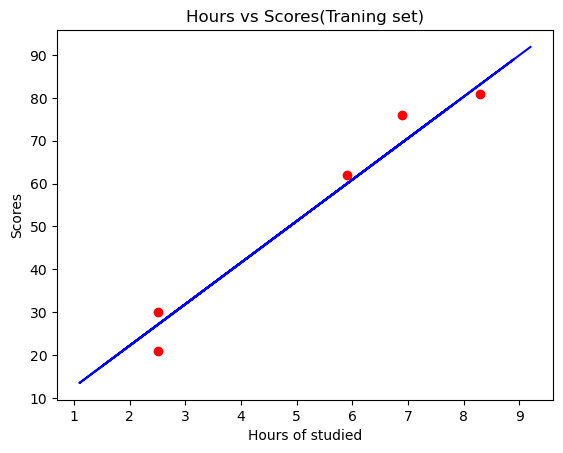

In [11]:
plt.scatter(x_test , y_test , color = "red")
plt.plot(x_train , regressor.predict(x_train) , color = "blue")
plt.title('Hours vs Scores(Traning set)')
plt.xlabel('Hours of studied')
plt.ylabel('Scores')
plt.show()

In [12]:
#We can also test with our own data
hours = 7.8
pred = regressor.predict([[hours]])
print('No. of Hours = {}' . format(hours))
print('Predicted Scores = {}' .format(pred[0]))

No. of Hours = 7.8
Predicted Scores = 78.34710195865416


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test , y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2: {r2}')

Mean Squared Error: 18.943211722315272
R2: 0.9678055545167994
